## Loading the Data

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set()
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()

## Preparing the Data

In [15]:
# making individual dataframes for each of the two penguin species of interest
adelie = df[df.species == "Adelie"]
chinstrap = df[df.species == "Chinstrap"]

# Also one combined dataframe that contains information on both species
options = ['Adelie','Chinstrap']
df_AC = df[df['species'].isin(options)]
df_AC = df_AC.dropna()

In [16]:
from sklearn.model_selection import train_test_split

def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
           
# Create target value array
X = df_AC[["bill_length_mm", "bill_depth_mm"]].to_numpy()
y = df_AC["species"].map(make_labels).to_numpy()

# partitioning the data with a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

## Data Visualization

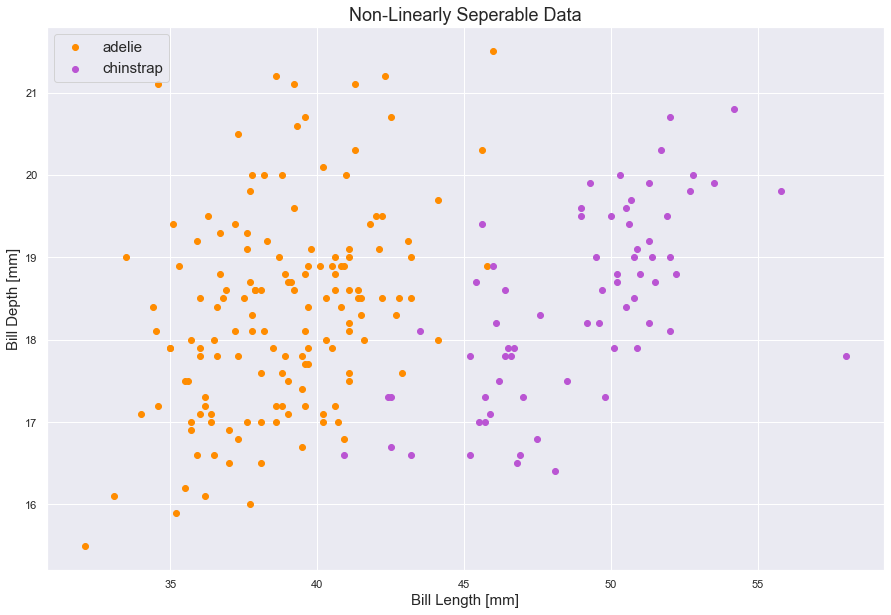

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

# bill length vs. bill depth for adelie and chinstrap species
ax1.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "darkorange", 
            label = "adelie")
ax1.scatter(chinstrap.bill_length_mm, 
            chinstrap.bill_depth_mm, 
            color = "mediumorchid", 
            label = "chinstrap")
ax1.set_xlabel("Bill Length [mm]", fontsize = 15)
ax1.set_ylabel("Bill Depth [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)

plt.show()


## Classification Report

In [18]:
#Importing libraries
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [24]:
stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")

tree_clf_6 = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf_6.fit(X_train, y_train)
tree_y_pred_6 = tree_clf_6.predict(X_test)
print(f"Tree Classification Report Depth = 6")
print(classification_report(y_test, tree_y_pred_6), "\n")

tree_clf_10 = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf_10.fit(X_train, y_train)
tree_y_pred_10 = tree_clf_10.predict(X_test)

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report Depth = 15")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        60
           1       0.79      1.00      0.88        26

    accuracy                           0.92        86
   macro avg       0.89      0.94      0.91        86
weighted avg       0.94      0.92      0.92        86
 

Tree Classification Report Depth = 6
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.93      1.00      0.96        26

    accuracy                           0.98        86
   macro avg       0.96      0.98      0.97        86
weighted avg       0.98      0.98      0.98        86
 

Tree Classification Report Depth = 15
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.93      1.00      0.96        26

    accuracy                           0.98        86
   macro avg       0.

The decision trees with depth=6 and depth=15 have the same metrics and both are significantly better than the stump.

In [20]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")


forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.89      0.92      0.91        26

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.94      0.94      0.94        86
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.89      0.92      0.91        26

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.94      0.94      0.94        86
 

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.96      1.00      0.98        26

    accuracy                           0.99        86
   macro avg       0.98      0.99 

In this case, the ADA Boost Classifier outperforms the forest classifier  and bagging classifier in all three metrics.
<br><br>
Overall, ADA Boost performs best out of the four. 

## Visualizing the Classifiers

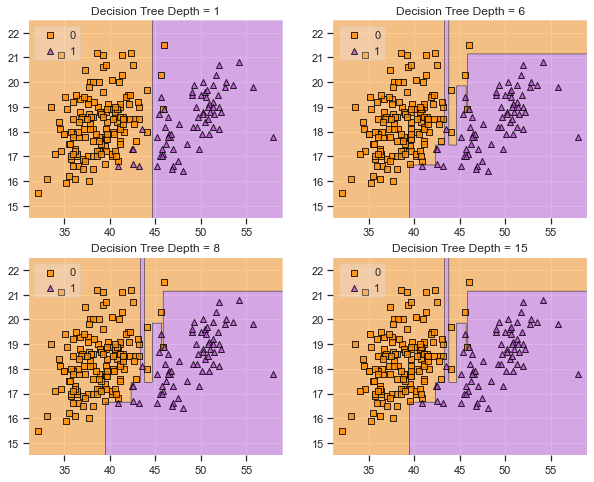

In [25]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Decision Tree Depth = 1', 'Decision Tree Depth = 6', 'Decision Tree Depth = 8', 'Decision Tree Depth = 15']
for clf, lab, grd in zip([stump_clf, tree_clf_6,  tree_clf_10, tree_clf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2, colors='darkorange,mediumorchid')
    plt.title(lab)

plt.show()

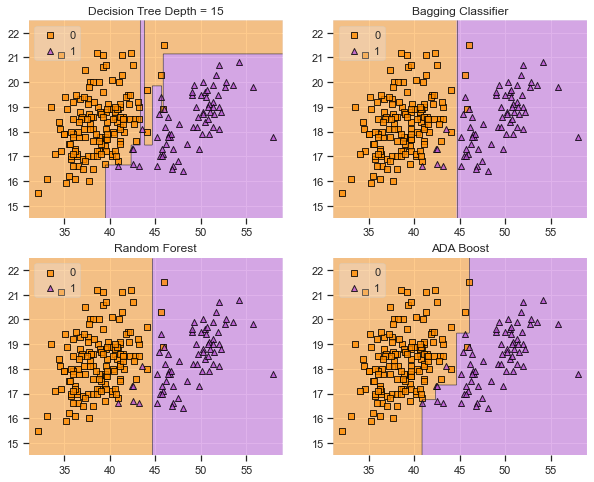

In [26]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Decision Tree Depth = 15', 'Bagging Classifier', 'Random Forest', 'ADA Boost']
for clf, lab, grd in zip([tree_clf, bag_clf,  forest_clf, ada_clf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2, colors='darkorange,mediumorchid')
    plt.title(lab)

plt.show()

## Increasing Features

In [ ]:
# Increasing the number of features
X = df_AC[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()

# Partitioning data with train/test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)

In [ ]:
# DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

# BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.93      1.00      0.96        26

    accuracy                           0.98        86
   macro avg       0.96      0.98      0.97        86
weighted avg       0.98      0.98      0.98        86
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.89      0.92      0.91        26

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.94      0.94      0.94        86
 



The Decision tree classifier with depth 15 out performs the bagging classifer in pretty much all three metrics precision, recall, f1-score.

In [ ]:
#RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

#AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"ADA Boost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.89      0.92      0.91        26

    accuracy                           0.94        86
   macro avg       0.93      0.94      0.93        86
weighted avg       0.94      0.94      0.94        86
 

ADA Boost Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.96      1.00      0.98        26

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86
 



In this case, the ADA Boost Classifier outperforms the forest classifier in all three metrics.
<br><br>
Overall, ADA Boost performs best out of the four. 

## Feature Importance

In [ ]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.48400000000000004
bill_depth_mm 0.11000000000000001
flipper_length_mm 0.3340000000000001
body_mass_g 0.07200000000000001


We can see that the most important features (the ones that contain the most discening information about the data) are bill length and flipper length.